In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD
import librosa
from TorchEMD import EmpricalModeDecomposition

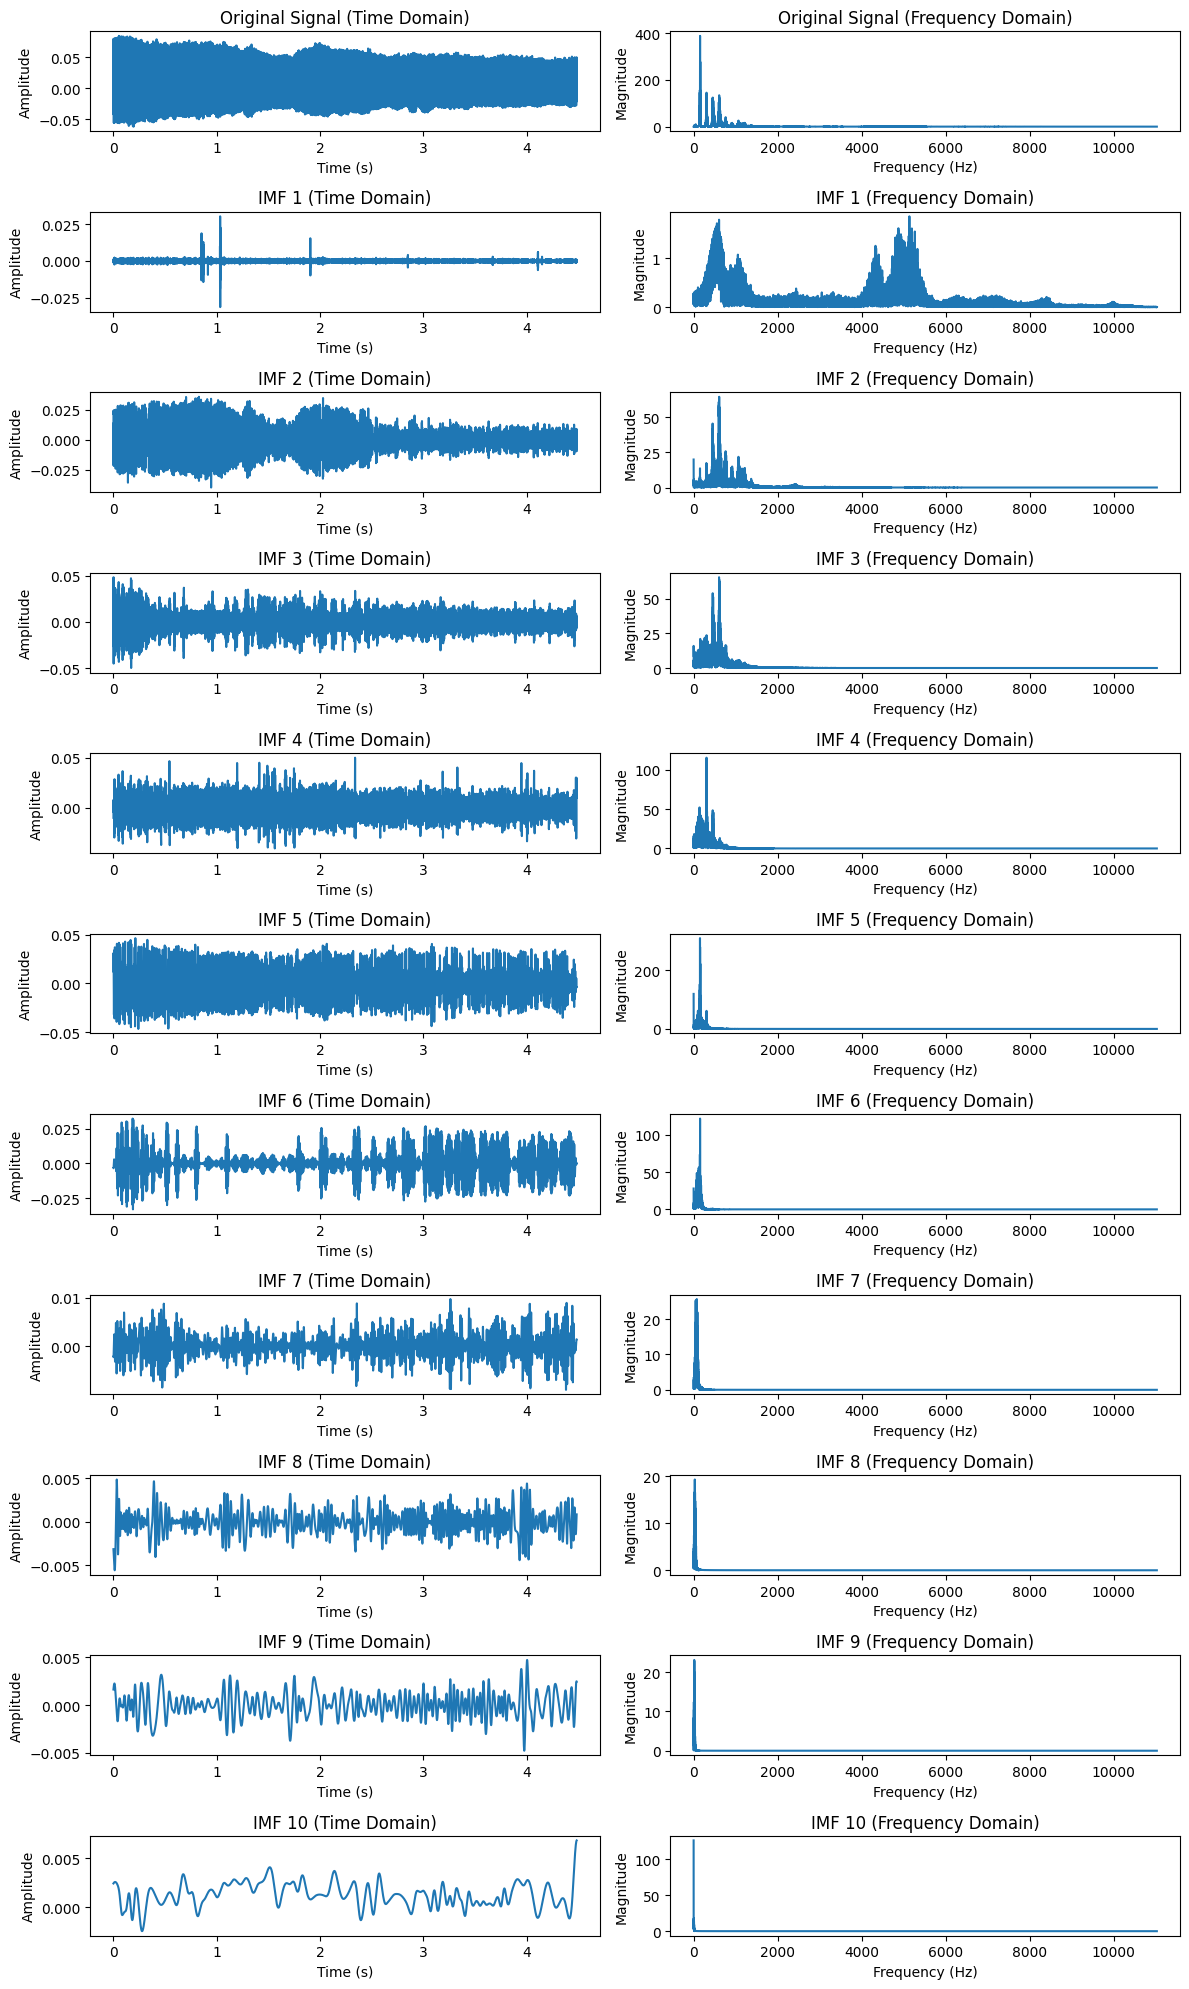

In [4]:
# Example signal (can be replaced with your data)
signal, sr = librosa.load("E:/Amrita/Subjects/Sem 5/BMSP paper work/Dataset/neurovoz_v3/data/audios/HC_A1_0034.wav")
t = np.linspace(0, len(signal)/sr, len(signal))  # time vector

emd = EMD(MAX_ITERATION=128, DTYPE=np.float32)
IMFs = emd.emd(signal, max_imf=9)

# emd = EmpricalModeDecomposition(tol=1e-3)
# IMFs, _ = emd.decompose(signal)

# Create a figure with 11x2 subplots (time domain and frequency domain)
plt.figure(figsize=(12, 20))

# Plot original signal and its frequency domain
plt.subplot(11, 2, 1)
plt.plot(t, signal)
plt.title("Original Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot original signal in frequency domain
freq = np.fft.fftfreq(len(signal), d=1/sr)
spectrum = np.abs(np.fft.fft(signal))
positive_freq = freq[:len(freq)//2]
positive_spectrum = spectrum[:len(spectrum)//2]
plt.subplot(11, 2, 2)
plt.plot(positive_freq, positive_spectrum)
plt.title("Original Signal (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Plot each IMF in time domain and frequency domain
for i, imf in enumerate(IMFs):
    # Time domain plot for IMF
    plt.subplot(11, 2, 2*i + 3)
    plt.plot(t, imf)
    plt.title(f"IMF {i + 1} (Time Domain)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Frequency domain plot for IMF
    spectrum_imf = np.abs(np.fft.fft(imf))
    positive_spectrum_imf = spectrum_imf[:len(spectrum_imf)//2]
    plt.subplot(11, 2, 2*i + 4)
    plt.plot(positive_freq, positive_spectrum_imf)
    plt.title(f"IMF {i + 1} (Frequency Domain)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot to a file
save_path = "imfs_time_freq_2.png"
plt.savefig(save_path)

# Show the plot
plt.show()